In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install Faker

In [3]:
from faker import Faker

fake = Faker()

In [4]:
def faker_categorical(num=1, seed=None):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)

    output = [
        {
            "Name": fake.name(),
            "Age": np.random.choice([np.random.randint(20, high =30),np.random.randint(30, high = 46),np.random.randint(46, high = 60)], p=[0.15, 0.7, 0.15]),
            "Wins/ Losses": np.random.choice(["Wins", "Loses"], p=[0.3, 0.7]),
            "Profession": np.random.choice(["IT", "Government", "Own Business", "Others"], p=[0.5, 0.3, 0.1, 0.1]),
            "First Car": np.random.choice(["Yes", "No"], p=[0.8, 0.2]),
            "Source of Info":  np.random.choice(["Friend", "Own","Ad Offer"], p=[0.7, 0.2, 0.1]),
            "Exchange": np.random.choice(["Yes", "No"], p=[0.8, 0.2])
        }
        for x in range(num)
    ]
    return output

In [5]:
df = pd.DataFrame(faker_categorical(num=5000, seed=0))

In [6]:
df.head()

,Age,Exchange,First Car,Name,Profession,Source of Info,Wins/ Losses
0,49,Yes,Yes,Norma Fisher,Government,Friend,Loses
1,36,Yes,Yes,Jorge Sullivan,Others,Friend,Loses
2,46,Yes,Yes,Elizabeth Woods,IT,Friend,Loses
3,39,Yes,Yes,Susan Wagner,IT,Friend,Loses
4,20,Yes,No,Peter Montgomery,IT,Friend,Wins


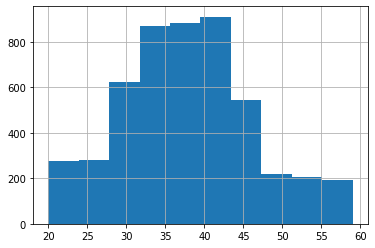

In [7]:
df.Age.hist()

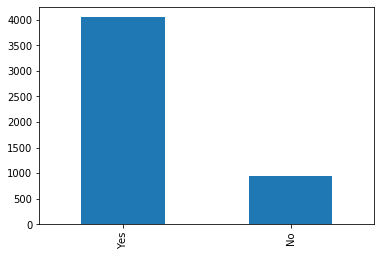

In [8]:
df.Exchange.value_counts().plot(kind="bar")

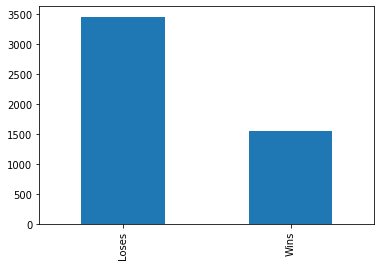

In [9]:
df['Wins/ Losses'].value_counts().plot(kind="bar")

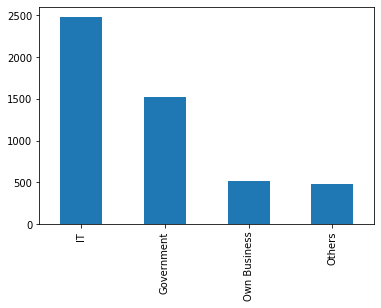

In [10]:
df['Profession'].value_counts().plot(kind="bar")

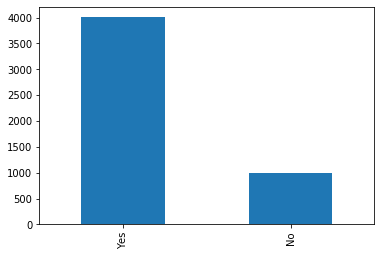

In [11]:
df['First Car'].value_counts().plot(kind="bar")

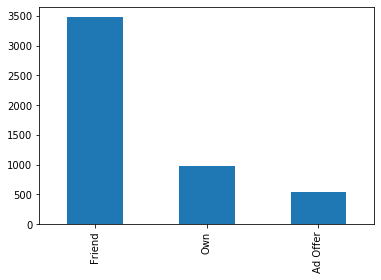

In [12]:
df['Source of Info'].value_counts().plot(kind="bar")

# EDA

In [20]:
df.head()

,Age,Exchange,First Car,Name,Profession,Source of Info,Wins/ Losses
0,49,Yes,Yes,Norma Fisher,Government,Friend,Loses
1,36,Yes,Yes,Jorge Sullivan,Others,Friend,Loses
2,46,Yes,Yes,Elizabeth Woods,IT,Friend,Loses
3,39,Yes,Yes,Susan Wagner,IT,Friend,Loses
4,20,Yes,No,Peter Montgomery,IT,Friend,Wins


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Age               5000 non-null int64
Exchange          5000 non-null object
First Car         5000 non-null object
Name              5000 non-null object
Profession        5000 non-null object
Source of Info    5000 non-null object
Wins/ Losses      5000 non-null object
dtypes: int64(1), object(6)
memory usage: 273.5+ KB


In [23]:
age = df.Age

In [24]:
name = df.Name

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1 = df.apply(le.fit_transform)

In [26]:
df1.head()

,Age,Exchange,First Car,Name,Profession,Source of Info,Wins/ Losses
0,29,1,1,3607,0,1,0
1,16,1,1,2249,2,1,0
2,26,1,1,1428,1,1,0
3,19,1,1,4409,1,1,0
4,0,1,0,3726,1,1,1


In [27]:
df1.Age = age

In [28]:
df1.Name = name

In [29]:
df1.head()

,Age,Exchange,First Car,Name,Profession,Source of Info,Wins/ Losses
0,49,1,1,Norma Fisher,0,1,0
1,36,1,1,Jorge Sullivan,2,1,0
2,46,1,1,Elizabeth Woods,1,1,0
3,39,1,1,Susan Wagner,1,1,0
4,20,1,0,Peter Montgomery,1,1,1


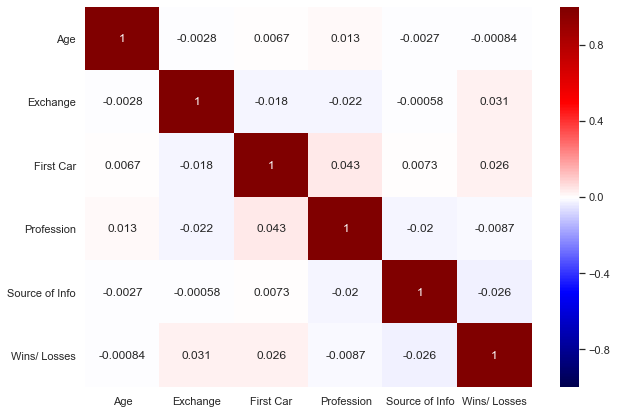

In [78]:
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df1.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

# Age Vs Target (Wins/ Losses)

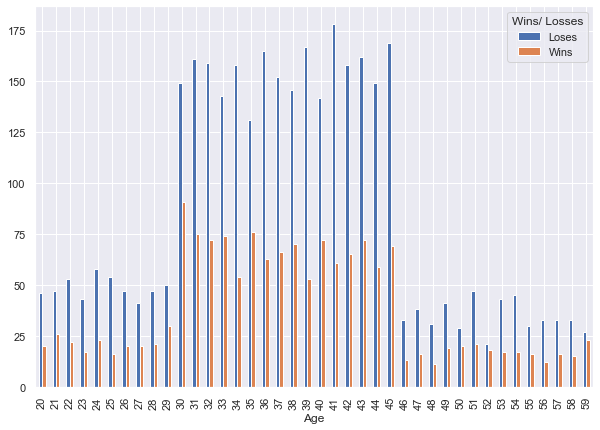

In [32]:
pd.crosstab(df.Age, df['Wins/ Losses']).plot(kind='bar')

# Exchange Vs Target (Wins/ Losses)

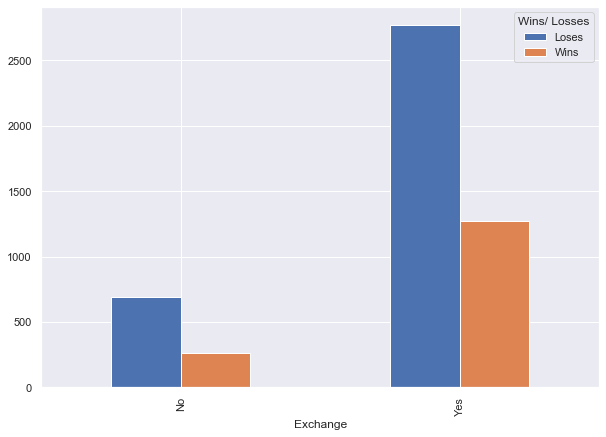

In [33]:
pd.crosstab(df['Exchange'], df['Wins/ Losses']).plot(kind='bar')

# First Car Vs Target (Wins/ Losses)

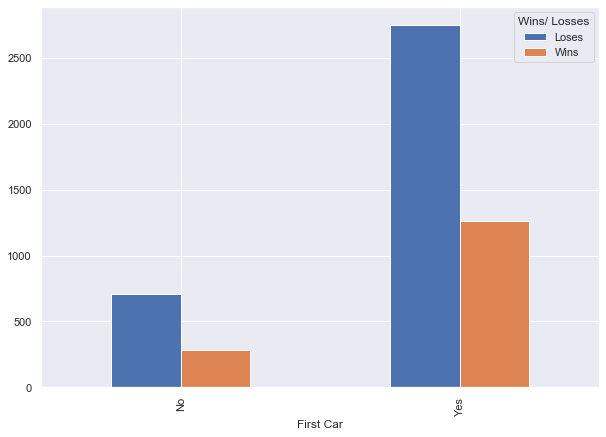

In [34]:
pd.crosstab(df['First Car'], df['Wins/ Losses']).plot(kind='bar')

# Profession Vs Target (Wins/ Losses)

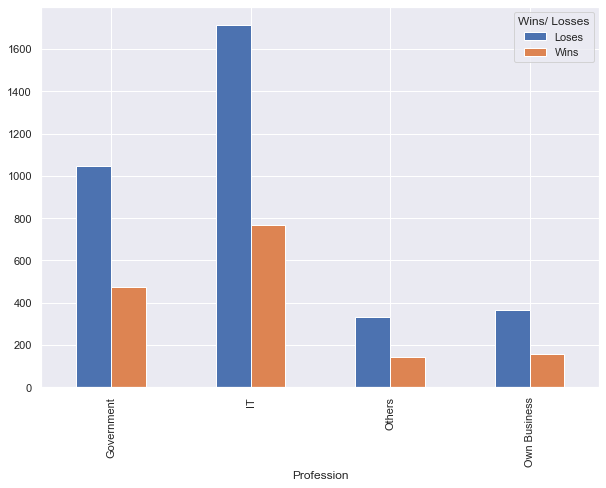

In [35]:
pd.crosstab(df['Profession'], df['Wins/ Losses']).plot(kind='bar')

# Source of Info Vs Target (Wins/ Losses)

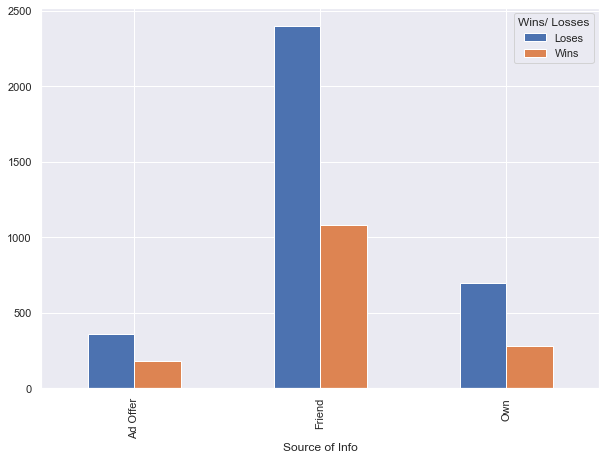

In [36]:
pd.crosstab(df['Source of Info'], df['Wins/ Losses']).plot(kind='bar')

#  Modelling

In [53]:
X=df1.drop(['Name', 'Wins/ Losses'],1)
y=df1["Wins/ Losses"]

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=45)

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=500,max_depth=15)

In [68]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
rf.score(X_train, y_train)

0.7514285714285714

In [70]:
pred = rf.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
accuracy_score(y_test, pred)

0.632

In [73]:
confusion_matrix(y_test, pred)

array([[878, 153],
       [399,  70]], dtype=int64)